In [5]:
import requests
import numpy as np

import matplotlib.pyplot as plt
import pandas as pd
import json
import scipy.stats as stats
import seaborn as sns
import matplotlib.dates as mdates
from datetime import datetime

/Users/adriennekirk/Flash Droughts/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


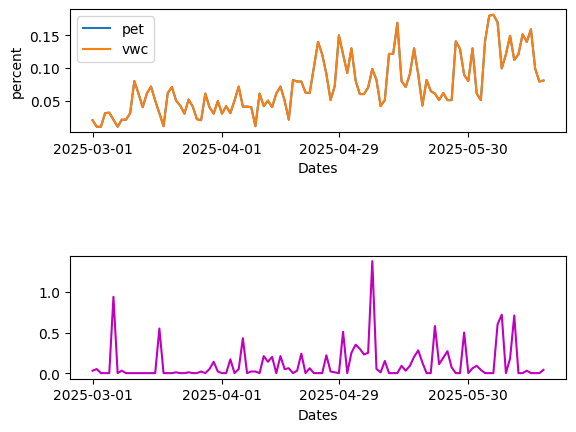

In [6]:
# year 2025, lat = 42.45, lon = -76.48


url = "https://csf-irrigation-api-worker.rcc-acis.workers.dev/vwc/?year=2025&lat=42.45&lon=-76.48&token=api-4a0607-token"

req = requests.get(url)
data = req.text
# print(data)

data = json.loads(data)
df = pd.DataFrame({
    "date": data["dates"],
    "precip": data["precip"],
    "pet": data["pet"],
    "vwc": data["pet"]
})
# print(df)

dates = df["date"]
precip = df["precip"]
pet = df["pet"]
vwc = df["vwc"]

fig, axs = plt.subplots(2,1)
axs[0].set_xlabel("Dates")
axs[0].set_ylabel("percent")
axs[0].plot(dates,pet,label = "pet")
axs[0].plot(dates,vwc,label = "vwc")
axs[0].xaxis.set_major_locator(mdates.MonthLocator())
axs[0].legend()
axs[1].plot(dates,precip, label = "precip", color = 'm')
axs[1].set_xlabel("Dates")
axs[1].xaxis.set_major_locator(mdates.MonthLocator())
plt.subplots_adjust(hspace = 1)


Text(0.5, 1.0, 'VWC')

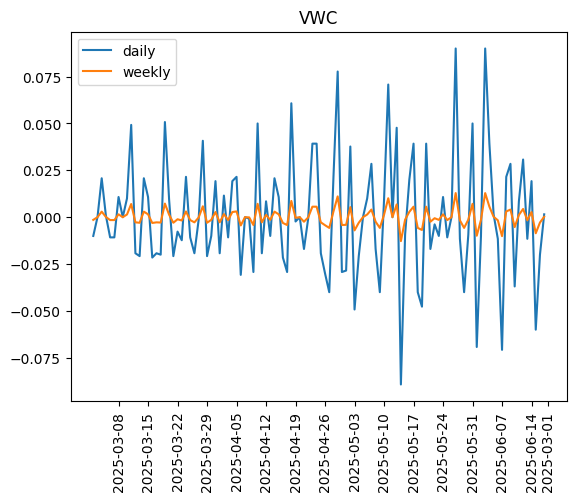

In [7]:
diff = np.diff(vwc)
plt.plot (dates[1:], diff, label = 'daily')
diff = np.diff(vwc) / 7
plt.plot (dates[1:], diff, label = 'weekly')
plt.tick_params(axis='x', rotation=45)
# plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=7))
plt.legend()
weekly = dates[::7]
plt.xticks(weekly, rotation=90)
plt.title('VWC')


Text(0.5, 1.0, 'VWC')

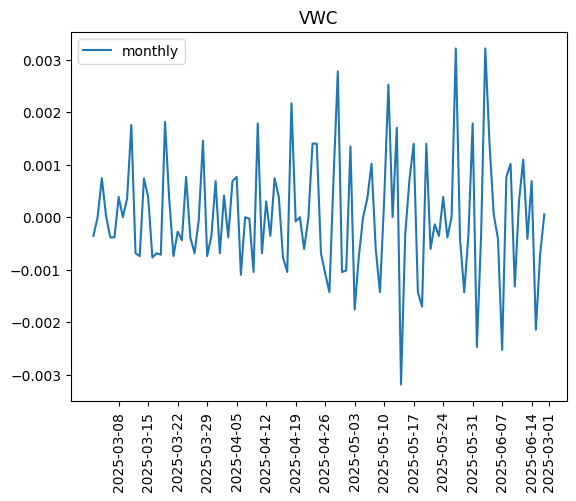

In [8]:
plt.tick_params(axis='x', rotation=45)
diff_fourweek = np.diff(vwc) / 28
plt.plot (dates[1:], diff_fourweek, label = 'monthly')
# plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=7))
plt.legend()
weekly = dates[::7]
plt.xticks(weekly, rotation=90)
plt.title('VWC')

In [9]:
# VWC per pentad


Text(0.5, 1.0, 'PET')

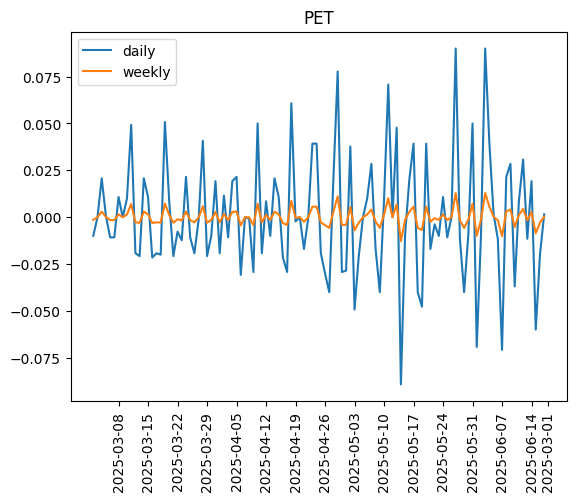

In [10]:
diff = np.diff(pet)
plt.plot (dates[1:], diff, label = 'daily')
diff = np.diff(pet) / 7
plt.plot (dates[1:], diff, label = 'weekly')
plt.tick_params(axis='x', rotation=45)
# plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=7))
plt.legend()
weekly = dates[::7]
plt.xticks(weekly, rotation=90)
plt.title('PET')


In [11]:
vwc_arr = vwc.to_numpy()
# cut out first value of nan
vwc_arr = vwc_arr[1:]
vwc_list = vwc_arr.tolist()
print(vwc_list)

[0.009999999776482582, 0.009999999776482582, 0.030764469876885414, 0.03152893856167793, 0.020764470100402832, 0.009999999776482582, 0.020764470100402832, 0.020764470100402832, 0.030764469876885414, 0.07999960333108902, 0.06076446920633316, 0.03999999910593033, 0.06076446920633316, 0.0715293362736702, 0.05000000074505806, 0.030764469876885414, 0.01076447032392025, 0.061529334634542465, 0.0707644671201706, 0.0500003956258297, 0.04229341074824333, 0.029999999329447746, 0.051528941839933395, 0.04076407477259636, 0.021529335528612137, 0.019999999552965164, 0.06076407432556152, 0.03999999910593033, 0.029999999329447746, 0.04923553019762039, 0.030000396072864532, 0.041528940200805664, 0.03076486475765705, 0.05000000074505806, 0.07152894139289856, 0.04076407477259636, 0.040764469653367996, 0.03999999910593033, 0.010764865204691887, 0.06076446920633316, 0.041528940200805664, 0.04999960586428642, 0.03999999910593033, 0.06076407432556152, 0.0715293362736702, 0.04999960586428642, 0.020764470100402

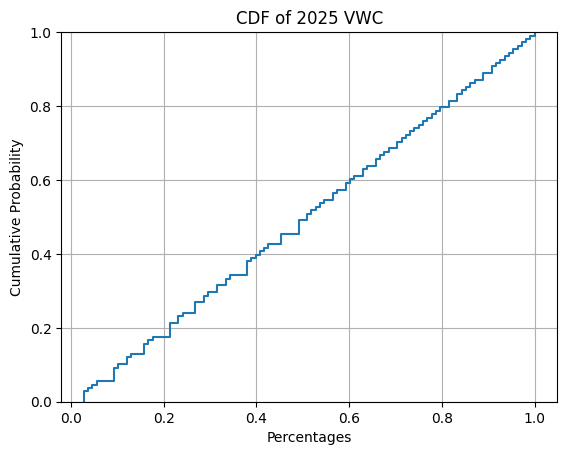

In [12]:
sorted_vwc = np.sort(vwc_list)
vwc_len = len(vwc_list)
cdf_vwc = []
for i in range(vwc_len):
    cdf = np.sum(sorted_vwc <= sorted_vwc[i])/vwc_len
    cdf_vwc.append(cdf)
sns.ecdfplot(cdf_vwc)
plt.title('CDF of 2025 VWC')
plt.xlabel('Percentages')
plt.ylabel('Cumulative Probability')
plt.grid(True)
# single point
# cdf_pointfive = stats.norm.cdf(0.5, loc = np.mean(vwc_list), scale = np.std(vwc_list))
# print(cdf_pointfive)
# range upper-lower


(array([12., 20., 22., 12., 16.,  5., 10.,  4.,  4.,  4.]),
 array([0.01      , 0.02715289, 0.04430579, 0.06145868, 0.07861158,
        0.09576447, 0.11291736, 0.13007026, 0.14722315, 0.16437605,
        0.18152894]),
 <BarContainer object of 10 artists>)

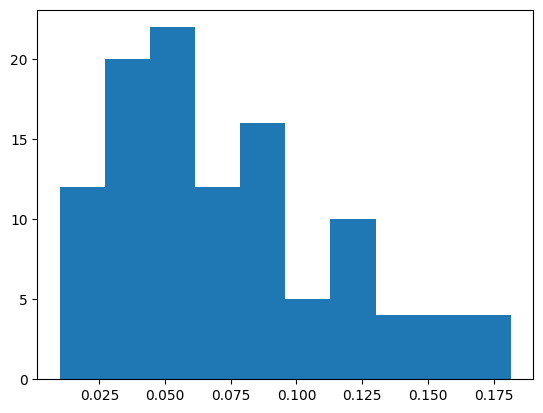

In [13]:
# plt.hist(pet)
plt.hist(vwc)

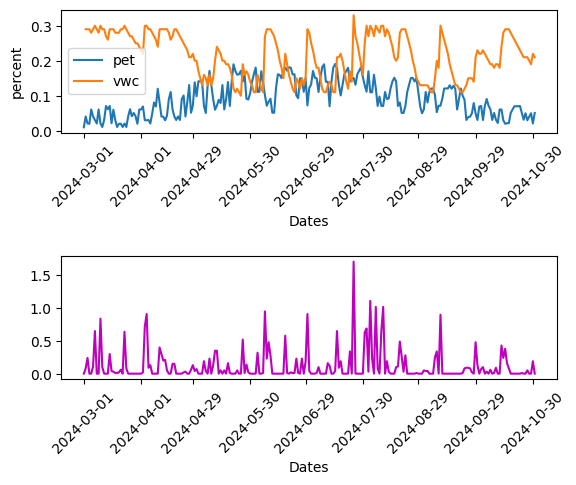

In [14]:
# year 2024, lat = 42.45, lon = -76.48


url = "https://csf-irrigation-api-worker.rcc-acis.workers.dev/vwc/?year=2024&lat=42.45&lon=-76.48&token=api-4a0607-token"

req = requests.get(url)
data = req.text
# print(data)

data = json.loads(data)
df = pd.DataFrame({
    "date": data["dates"],
    "precip": data["precip"],
    "pet": data["pet"],
    "vwc": data["vwc"]
})
# print(df)

dates = df["date"]
precip = df["precip"]
pet = df["pet"]
vwc = df["vwc"]

fig, axs = plt.subplots(2,1)
axs[0].set_xlabel("Dates")
axs[0].set_ylabel("percent")
axs[0].plot(dates,pet,label = "pet")
axs[0].plot(dates,vwc,label = "vwc")
axs[0].xaxis.set_major_locator(mdates.MonthLocator())
axs[0].legend()
axs[1].plot(dates,precip, label = "precip", color = 'm')
axs[1].set_xlabel("Dates")
axs[1].xaxis.set_major_locator(mdates.MonthLocator())
axs[0].tick_params(axis='x', rotation=45)
axs[1].tick_params(axis='x', rotation=45)
plt.subplots_adjust(hspace = 1)

([<matplotlib.axis.XTick at 0x130bfc580>,
 [Text(244.0, 0, '2024-03-01'),
  Text(6.0, 0, '2024-03-08'),
  Text(13.0, 0, '2024-03-15'),
  Text(20.0, 0, '2024-03-22'),
  Text(27.0, 0, '2024-03-29'),
  Text(34.0, 0, '2024-04-05'),
  Text(41.0, 0, '2024-04-12'),
  Text(48.0, 0, '2024-04-19'),
  Text(55.0, 0, '2024-04-26'),
  Text(62.0, 0, '2024-05-03'),
  Text(69.0, 0, '2024-05-10'),
  Text(76.0, 0, '2024-05-17'),
  Text(83.0, 0, '2024-05-24'),
  Text(90.0, 0, '2024-05-31'),
  Text(97.0, 0, '2024-06-07'),
  Text(104.0, 0, '2024-06-14'),
  Text(111.0, 0, '2024-06-21'),
  Text(118.0, 0, '2024-06-28'),
  Text(125.0, 0, '2024-07-05'),
  Text(132.0, 0, '2024-07-12'),
  Text(139.0, 0, '2024-07-19'),
  Text(146.0, 0, '2024-07-26'),
  Text(153.0, 0, '2024-08-02'),
  Text(160.0, 0, '2024-08-09'),
  Text(167.0, 0, '2024-08-16'),
  Text(174.0, 0, '2024-08-23'),
  Text(181.0, 0, '2024-08-30'),
  Text(188.0, 0, '2024-09-06'),
  Text(195.0, 0, '2024-09-13'),
  Text(202.0, 0, '2024-09-20'),
  Text(209.0,

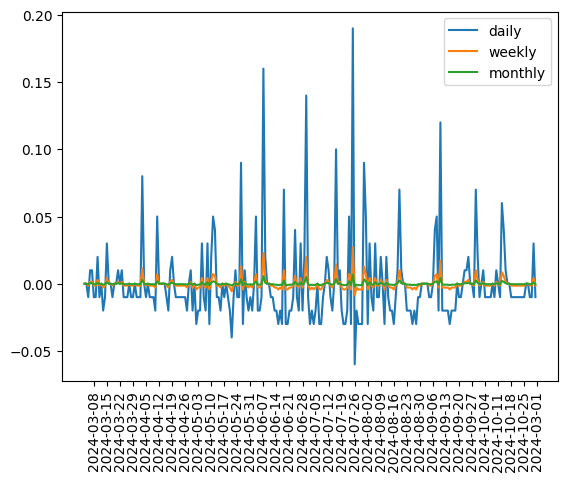

In [15]:
diff = np.diff(vwc)
plt.plot (dates[1:], diff, label = 'daily')
diff_week = np.diff(vwc) / 7
plt.plot (dates[1:], diff_week, label = 'weekly')
plt.tick_params(axis='x', rotation=45)
diff_fourweek = np.diff(vwc) / 28
plt.plot (dates[1:], diff_fourweek, label = 'monthly')
# plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=7))
plt.legend()
weekly = dates[::7]
plt.xticks(weekly, rotation=90)


([<matplotlib.axis.XTick at 0x130e06a90>,
 [Text(244.0, 0, '2024-03-01'),
  Text(6.0, 0, '2024-03-08'),
  Text(13.0, 0, '2024-03-15'),
  Text(20.0, 0, '2024-03-22'),
  Text(27.0, 0, '2024-03-29'),
  Text(34.0, 0, '2024-04-05'),
  Text(41.0, 0, '2024-04-12'),
  Text(48.0, 0, '2024-04-19'),
  Text(55.0, 0, '2024-04-26'),
  Text(62.0, 0, '2024-05-03'),
  Text(69.0, 0, '2024-05-10'),
  Text(76.0, 0, '2024-05-17'),
  Text(83.0, 0, '2024-05-24'),
  Text(90.0, 0, '2024-05-31'),
  Text(97.0, 0, '2024-06-07'),
  Text(104.0, 0, '2024-06-14'),
  Text(111.0, 0, '2024-06-21'),
  Text(118.0, 0, '2024-06-28'),
  Text(125.0, 0, '2024-07-05'),
  Text(132.0, 0, '2024-07-12'),
  Text(139.0, 0, '2024-07-19'),
  Text(146.0, 0, '2024-07-26'),
  Text(153.0, 0, '2024-08-02'),
  Text(160.0, 0, '2024-08-09'),
  Text(167.0, 0, '2024-08-16'),
  Text(174.0, 0, '2024-08-23'),
  Text(181.0, 0, '2024-08-30'),
  Text(188.0, 0, '2024-09-06'),
  Text(195.0, 0, '2024-09-13'),
  Text(202.0, 0, '2024-09-20'),
  Text(209.0,

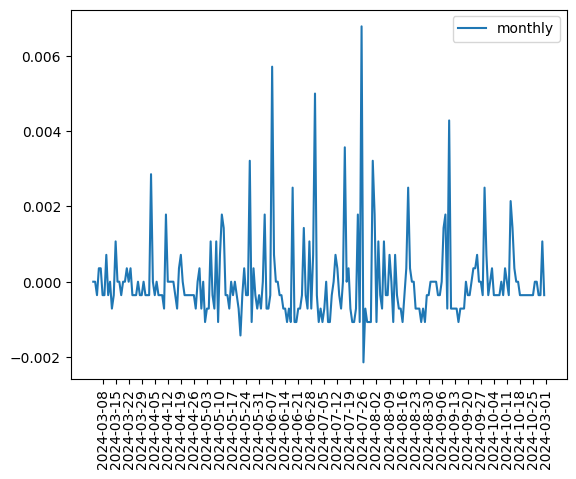

In [16]:
plt.tick_params(axis='x', rotation=45)
diff_fourweek = np.diff(vwc) / 28
plt.plot (dates[1:], diff_fourweek, label = 'monthly')
# plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=7))
plt.legend()
weekly = dates[::7]
plt.xticks(weekly, rotation=90)

(array([6.43524028, 6.09654343, 4.741756  , 6.09654343, 8.12872457,
        8.80611828, 5.41914971, 2.70957486, 4.741756  , 5.75784657,
        8.12872457, 4.741756  , 3.72566543, 3.72566543, 3.72566543]),
 array([0.01      , 0.02205099, 0.03410198, 0.04615297, 0.05820396,
        0.07025495, 0.08230594, 0.09435693, 0.10640792, 0.11845892,
        0.13050991, 0.1425609 , 0.15461189, 0.16666288, 0.17871387,
        0.19076486]),
 <BarContainer object of 15 artists>)

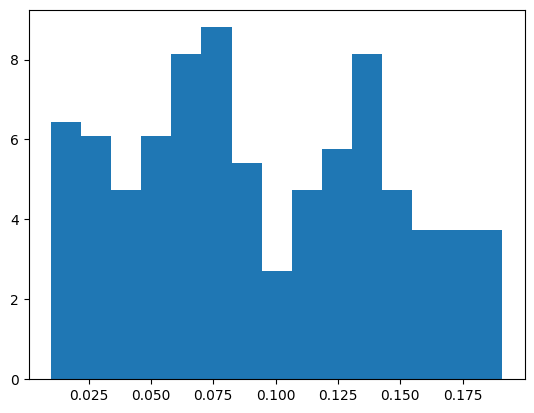

In [17]:
plt.hist(pet, bins=15, density = True)

In [18]:
# sdate & edate for start and end dates

def plot_pet_vwc_precip(lat,lon,year=None,sdate=None,edate=None):
    if sdate is None:
        url = f"https://csf-irrigation-api-worker.rcc-acis.workers.dev/vwc/?year={year}&lat={lat}&lon={lon}&token=api-4a0607-token"
    else:
        url = f"https://csf-irrigation-api-worker.rcc-acis.workers.dev/vwc/?&sdate={sdate}&edate={edate}&lat={lat}&lon={lon}&token=api-4a0607-token"
    
    req = requests.get(url)
    data = req.text
    # print(data)
    
    data = json.loads(data)
    df = pd.DataFrame({
        "date": data["dates"],
        "precip": data["precip"],
        "pet": data["pet"],
        "vwc": data["vwc"]
    })
    # print(df)
    
    dates = df["date"]
    precip = df["precip"]
    pet = df["pet"]
    vwc = df["vwc"]
    fig, axs = plt.subplots(2,1)
    axs[0].set_xlabel("Dates")
    axs[0].set_ylabel("percent")
    # axs[0].plot(dates,pet,label = "pet")
    # axs[0].plot(dates,vwc,label = "vwc")
    axs[0].xaxis.set_major_locator(mdates.MonthLocator())
    axs[0].legend()
    # axs[1].plot(dates,precip, label = "precip", color = 'm')
    axs[1].set_xlabel("Dates")
    axs[1].xaxis.set_major_locator(mdates.MonthLocator())
    axs[1].tick_params(axis='x', labelrotation=45)
    axs[0].tick_params(axis='x', labelrotation=45)
    plt.subplots_adjust(hspace=1)
    return (axs[0].plot(dates,pet,label = "pet"), axs[0].plot(dates,vwc,label = "vwc"), axs[1].plot(dates,precip, label = "precip", color = 'm'), axs[0].legend())
        


In [19]:
# plot_pet_vwc_precip( 42.45, -76.48, '2024-03-01','2024-5-31')

In [20]:
# plot_pet_vwc_precip(43.45, -75.48, 2024)

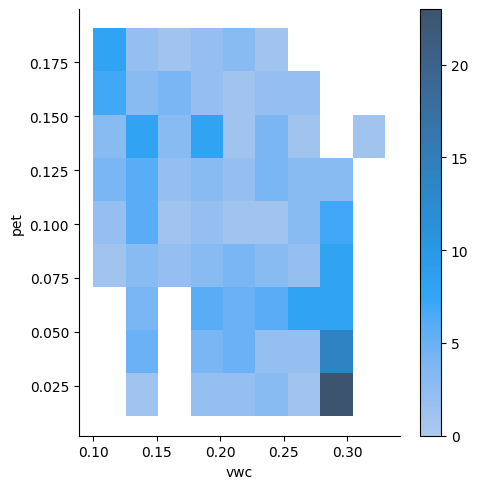

In [21]:
sns.displot(df, x="vwc", y="pet", cbar=True)

In [22]:
# Random Code from filtering
# Group data by weeks starting on tuesday
# # spring_weekly = spring[['vwc', 'pet']].resample('W-MON').sum()
# weekly_spring = spring['date'].dt.dayofweek
# spring.loc[:,'Weekly Index'] = weekly_spring
# tuesday_dates = spring['date'][spring['Weekly Index'] == 1]
# weeks = 
# spring.index = pd.to_datetime(spring.index)
# spring['week_start'] = spring.index - pd.to_timedelta((spring.index.dayofweek - 1) % 7, unit='D')
# print(spring['week_start'])
# week_vwc = spring['vwc'][spring['week_start'] == 1]
# spring_weekly_precip = spring.groupby('week_start')['precip'].sum()
# spring_weekly_pet = spring.groupby('week_start')['pet'].sum()
# spring_week = pd.DataFrame({'Tuesdays' : spring['week_start'], 'VWC' : week_vwc })
# weekly_spring = spring['date'].dt.dayofweek
# spring.loc[:,'Weekly Index'] = weekly_spring
# first_tuesday = spring.loc[spring['Weekly Index'] == 1, 'date'].min()
# spring = spring[spring['date'] >= first_tuesday]
# spring = spring.reset_index(drop=True)
# print(first_tuesday)
# print(spring)
# spring['pet'] = pd.to_numeric(spring['pet'], errors='coerce')
# spring['precip'] = pd.to_numeric(spring['precip'], errors='coerce')
# spring['vwc'] = pd.to_numeric(spring['vwc'], errors='coerce')


In [144]:
# """Code for creating histograms with curves for PET, VWC, and Precipation for Portland from 2002 - 2025"""

# """Creates a dataframe out of the data with dates, precip, pet, vwc for the columns"""

# sdate = '2002-03-01'
# edate = '2025-05-31'
# lat = 38
# # (37.15 stops 2002)
# # (35.48 stops 2020)
# lon = -82.72
# # (-82.72 stops 2002 data)
# # lon = -97.52  (stops 2020 data)

# url = f"https://csf-irrigation-api-worker.rcc-acis.workers.dev/vwc/?sdate={sdate}&edate={edate}&lat={lat}&lon={lon}&token=api-4a0607-token"

# req = requests.get(url)
# data = req.text
# # print(data)

# data = json.loads(data)
# df = pd.DataFrame({
#     "date": data["dates"],
#     "precip": data["precip"],
#     "pet": data["pet"],
#     "vwc": data["vwc"]
# })
# df = df[1::]

In [145]:
# # Spring
# observed, bins = np.histogram(spring_weekly_pet_arr, bins=30)
# bin_centers = (bins[:-1] + bins[1:]) / 2
# bin_widths = np.diff(bins)
# kde = gaussian_kde(spring_weekly_pet_arr)
# kde_vals = kde(bin_centers)
# expected = kde_vals * bin_widths * len(spring_weekly_pet_arr)
# spring_chi = np.sum((observed - expected)**2 / expected)
# ddof = len(observed) - 1
# p_value = 1 - scipy.stats.chi2.cdf(spring_chi, ddof)
# print(p_value)



In [ ]:
# # Spring
# observed, bins = np.histogram(spring_weekly_precip_arr, bins=30)
# bin_centers = (bins[:-1] + bins[1:]) / 2
# bin_widths = np.diff(bins)
# cdf_vals = stats.gamma.cdf(bins, a=sp_a_fit, loc=sp_loc_fit, scale=sp_scale_fit)
# expected = (cdf_vals[1:] - cdf_vals[:-1]) * len(spring_weekly_precip_arr)
# valid = expected >= 5
# chi2_stat = np.sum((observed[valid] - expected[valid])**2 / expected[valid])
# ddof = np.sum(valid) - 2 - 1
# p_value = 1 - scipy.stats.chi2.cdf(chi2_stat, ddof)
# print(p_value)